<a href="https://colab.research.google.com/github/erfanera/SlumImprovment/blob/main/demo/House%20Segmenting%20demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure
import numpy as np
import requests

import copy
from PIL import Image
from io import BytesIO
import math
import cv2
import matplotlib.pyplot as plt
from skimage import measure
import numpy as np
import requests

from PIL import Image
from io import BytesIO

from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
from skimage import img_as_bool, img_as_ubyte

from skimage.morphology import skeletonize, dilation, square
import imageio

import networkx as nx

import matplotlib.pyplot as plt

In [9]:
def readGitHubUrl(webAddress):
    img_url = webAddress

    # Get the image from the URL
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content)).convert('RGB')

    # Convert the image to grayscale
    bw_image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    return bw_image

In [10]:

cells = readGitHubUrl("https://raw.githubusercontent.com/erfanera/SlumImprovment/main/Images/building.png")


In [11]:


cells = 255 - cells
_, paths_mask = cv2.threshold(cells, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to clean up noise and enhance path structures
kernel = np.ones((5, 5), np.uint8)  # You can adjust the kernel size as needed
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)
ret,thresh = cv2.threshold(cells,100,255,cv2.THRESH_BINARY_INV)


labels= measure.label(thresh, background=0)
bg_label = labels[0,0]
labels[labels==bg_label] = 0 # Assign background label to 0

props = measure.regionprops(labels)
centroids = np.zeros(shape=(len(np.unique(labels)),2)) # Access the coordinates of centroids


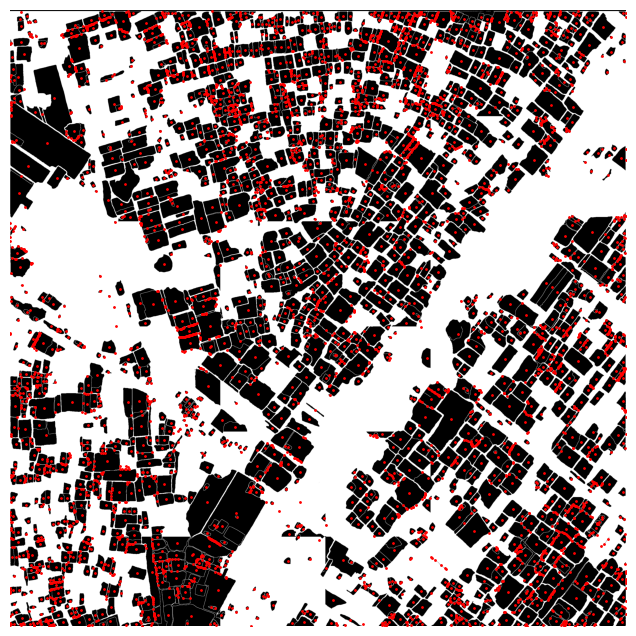

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#plt.figure(figsize=(20, 20))
plt.axis('off')
ax.imshow(cells,cmap='gray')

for i,prop in enumerate(props):
    my_centroid = prop.centroid
    centroids[i,:]= my_centroid
    ax.plot(my_centroid[1],my_centroid[0],'r.',markersize=2)

plt.show()

In [ ]:
len(centroids)

4817

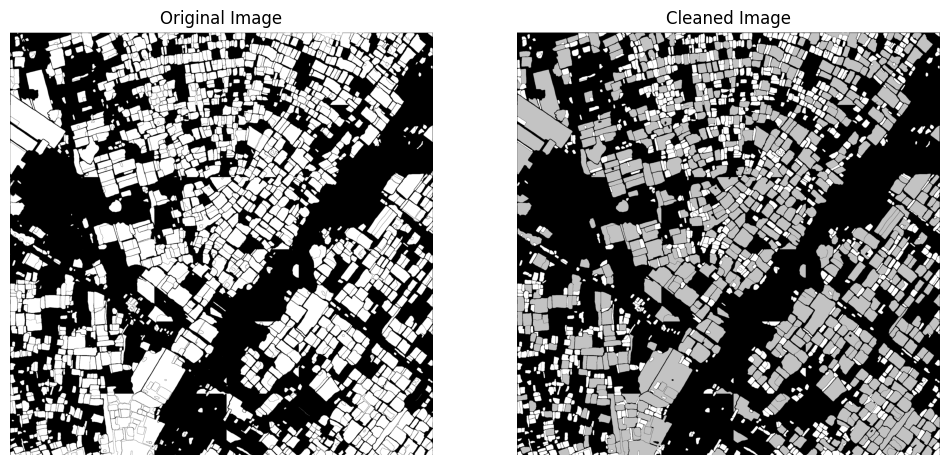

In [13]:

# Read the image and convert to binary

_, paths_mask = cv2.threshold(cells, 127, 255, cv2.THRESH_BINARY_INV)
revert = 255-cells
# Apply morphological operations to clean up noise
kernel = np.ones((5, 5), np.uint8)
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)

# Label the connected components
labels = measure.label(cleaned_paths, background=0)
props = measure.regionprops(labels)

# Create a new image to store the cleaned cells, initially set all to background (0)
cleaned_cells = np.zeros_like(cells)

# Loop through all detected regions
for prop in props:
    if prop.area >= 200:  # Keep regions with area >= 20 pixels
        # Add the region to the cleaned_cells image
        if prop.area >=2000 :
          cleaned_cells[labels == prop.label] = 195
        else:
          cleaned_cells[labels == prop.label] = 255

# Display the original and cleaned images for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(revert, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cleaned_cells, cmap='gray')
ax[1].set_title('Cleaned Image')
ax[1].axis('off')

plt.show()


In [14]:
height, width = cleaned_paths.shape[:2]
print(height, width)

3000 3000


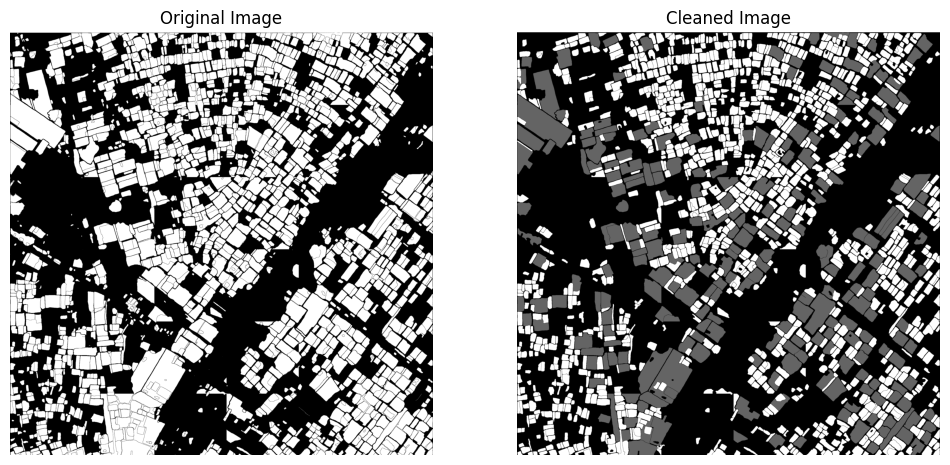

In [15]:
kernel = np.ones((5, 5), np.uint8)
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)

# Label the connected components
labels = measure.label(cleaned_paths, background=0)
props = measure.regionprops(labels)

# Create a new image to store the cleaned cells, initially set all to background (0)
cleaned_cells = np.zeros_like(cells)
houseCentroid = []
amenityCentroid = []
# Loop through all detected regions
for prop in props:
    if prop.area >= 600:  # Keep regions with area >= 20 pixels
        center = prop.centroid
        # Add the region to the cleaned_cells image
        if prop.area >=4000 :
          cleaned_cells[labels == prop.label] = 100#[255, 255, 0]
          amenityCentroid.append(center)
        else:
          cleaned_cells[labels == prop.label] = 255
          houseCentroid.append(center)
# Display the original and cleaned images for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(revert, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cleaned_cells, cmap='gray')
ax[1].set_title('Cleaned Image')
ax[1].axis('off')

plt.show()

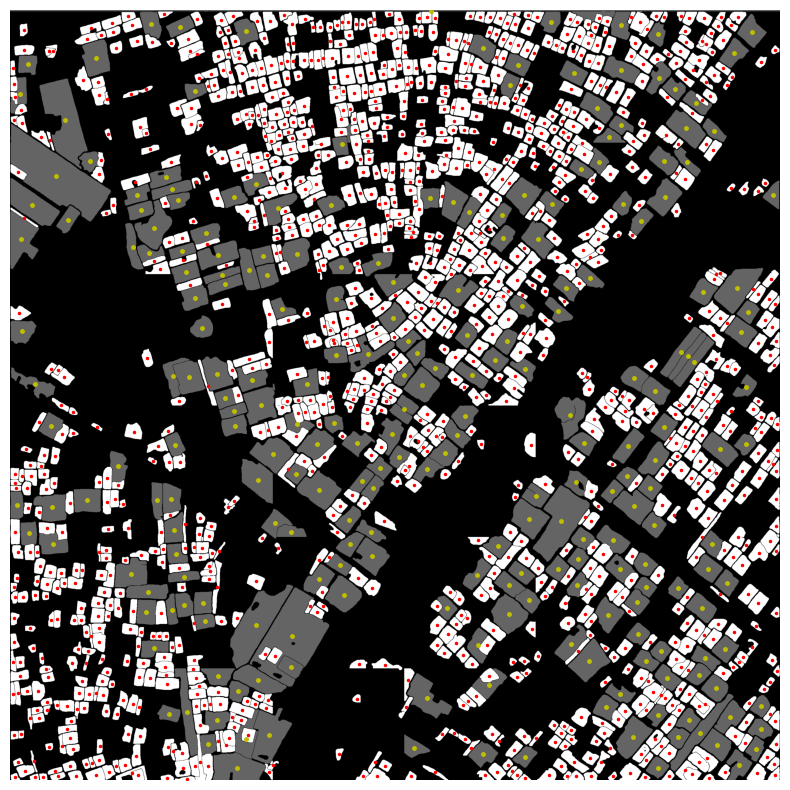

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#plt.figure(figsize=(20, 20))
plt.axis('off')
ax.imshow(cleaned_cells,cmap='gray')

for i in (houseCentroid):
    #my_centroid = prop.centroid
    #centroids[i,:]= my_centroid
    ax.plot(i[1],i[0],'r.',markersize=3)
for i in (amenityCentroid):
    #my_centroid = prop.centroid
    #centroids[i,:]= my_centroid
    ax.plot(i[1],i[0],'y.',markersize=5  )



plt.show()

In [17]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure
import numpy as np
import requests
from PIL import Image
from io import BytesIO

def process_image(image_url):
    # 从 URL 获取图像
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert('RGB')

    # Convert the image to grayscale
    bw_image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)

    # Invert the image
    bw_image = 255 - bw_image

    # Thresholding
    _, paths_mask = cv2.threshold(bw_image, 127, 255, cv2.THRESH_BINARY_INV)

    # Morphological operations to clean up noise and enhance path structures
    kernel = np.ones((5, 5), np.uint8)
    cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)

    # Label the connected components
    labels = measure.label(cleaned_paths, background=0)
    props = measure.regionprops(labels)

    # Create a new image to store the cleaned cells, initially set all to background (0)
    cleaned_cells = np.zeros_like(bw_image)

    # Loop through all detected regions
    for prop in props:
        if prop.area >= 600:  # Keep regions with area >= 20 pixels
            center = prop.centroid
            # Add the region to the cleaned_cells image
            if prop.area >= 4000:
                cleaned_cells[labels == prop.label] = 100
            else:
                cleaned_cells[labels == prop.label] = 255

    return cleaned_cells



In [1]:
pip install gradio opencv-python-headless numpy matplotlib scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.4/314.4 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.6 MB/s eta 

In [2]:
!pip show gradio

Name: gradio
Version: 4.28.3
Summary: Python library for easily interacting with trained machine learning models
Home-page: 
Author: 
Author-email: Abubakar Abid <gradio-team@huggingface.co>, Ali Abid <gradio-team@huggingface.co>, Ali Abdalla <gradio-team@huggingface.co>, Dawood Khan <gradio-team@huggingface.co>, Ahsen Khaliq <gradio-team@huggingface.co>, Pete Allen <gradio-team@huggingface.co>, Ömer Faruk Özdemir <gradio-team@huggingface.co>, Freddy A Boulton <gradio-team@huggingface.co>, Hannah Blair <gradio-team@huggingface.co>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiofiles, altair, fastapi, ffmpy, gradio-client, httpx, huggingface-hub, importlib-resources, jinja2, markupsafe, matplotlib, numpy, orjson, packaging, pandas, pillow, pydantic, pydub, python-multipart, pyyaml, ruff, semantic-version, tomlkit, typer, typing-extensions, urllib3, uvicorn
Required-by: 


In [6]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure
import numpy as np
import requests
from PIL import Image
from io import BytesIO

def read_image_from_url(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    return np.array(img)

def process_image(image_url, strength):
    # Read the image from the URL
    img = read_image_from_url(image_url)

    # Convert the image to grayscale
    bw_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Invert the image
    bw_image = 255 - bw_image

    # Thresholding
    _, paths_mask = cv2.threshold(bw_image, 127, 255, cv2.THRESH_BINARY_INV)

    # Morphological operations to clean up noise and enhance path structures
    kernel = np.ones((5, 5), np.uint8)
    cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)

    # Label the connected components
    labels = measure.label(cleaned_paths, background=0)
    props = measure.regionprops(labels)

    # Create a new image to store the cleaned cells, initially set all to background (0)
    cleaned_cells = np.zeros_like(bw_image)

    # Loop through all detected regions

    num_cells_small = 0
    num_cells_big = 0
    for prop in props:
        if prop.area >= 600:  # Keep regions with area >= 20 pixels
            # Add the region to the cleaned_cells image
            if prop.area >= 4000:
                cleaned_cells[labels == prop.label] = 100
                num_cells_small += 1
            else:
                cleaned_cells[labels == prop.label] = 255
                num_cells_big += 1

    # Apply strength factor
    cleaned_cells = np.clip(cleaned_cells * strength, 0, 255).astype(np.uint8)

    return cleaned_cells, num_cells_small, num_cells_big

# Gradio code
import gradio as gr

iface = gr.Interface(
    fn=process_image,
    inputs=["text", "slider"],
    outputs=[
        "image",
        gr.Text(label="Big houses"),
        gr.Text(label="Small houses")
    ],
    title="Image Processing Demo",
    description="Enter an image URL and adjust the strength.",
    allow_flagging=False,
    live=True
)

iface.launch(inline=True)


/usr/local/lib/python3.10/dist-packages/gradio/interface.py:374: UserWarning: The `allow_flagging` parameter in `Interface` nowtakes a string value ('auto', 'manual', or 'never'), not a boolean. Setting parameter to: 'never'.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()

Could not create share link. Missing file: /usr/local/lib/python3.10/dist-packages/gradio/frpc_linux_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_linux_amd64
2. Rename the downloaded file to: frpc_linux_amd64_v0.2
3. Move the file to this location: /usr/local/lib/python3.10/dist-packages/gradio


<IPython.core.display.Javascript object>

In [3]:
pip install gradio requests pillow

In [4]:
pip install folium gradio

In [19]:
import gradio as gr
import folium

def create_map(location, zoom):
    try:
        # 检查输入是否为空或不完整
        if not location or ',' not in location:
            return "請輸入有效的坐標格式，例如 '25.0330,121.5654'。"

        lat, lon = map(float, location.split(","))
        m = folium.Map(location=[lat, lon], zoom_start=zoom, tiles='OpenStreetMap')

        # 直接返回地图的 HTML 表示形式
        return m._repr_html_()
    except ValueError:
        # 提供更具体的错误信息
        return "錯誤：請確保輸入的坐標格式正確，如 '25.0330,121.5654'。"
    except Exception as e:
        # 捕捉并返回其他类型的错误信息
        return f"未知錯誤：{str(e)}"

iface = gr.Interface(
    fn=create_map,
    inputs=[
        gr.Textbox(label="中心座標（緯度,經度）", placeholder="25.0330,121.5654"),  # 預設位置為台北101
        gr.Slider(minimum=1, maximum=19, value=13, label="縮放等級")
    ],
    outputs="html",
    title="OpenStreetMap 衛星地圖",
    description="輸入經緯度和縮放等級以查看 OpenStreetMap 的衛星地圖。"
)

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()


/usr/local/lib/python3.10/dist-packages/gradio/analytics.py:99: UserWarning: unable to parse version details from package URL.
  warnings.warn("unable to parse version details from package URL.")



Could not create share link. Missing file: /usr/local/lib/python3.10/dist-packages/gradio/frpc_linux_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_linux_amd64
2. Rename the downloaded file to: frpc_linux_amd64_v0.2
3. Move the file to this location: /usr/local/lib/python3.10/dist-packages/gradio


<IPython.core.display.Javascript object>

In [ ]:
pip install gradio ipyleaflet opencv-python-headless numpy pillow scikit-image

In [ ]:
import gradio as gr
import folium

def create_map(lat, lon, zoom):
    try:
        # 创建地图对象
        m = folium.Map(location=[lat, lon], zoom_start=zoom, tiles='OpenStreetMap')
        # 将地图对象转换为 HTML 字符串
        map_html = m._repr_html_()
        return map_html
    except Exception as e:
        return f"Error creating map: {str(e)}"

# 设置 Gradio 界面
iface = gr.Interface(
    fn=create_map,
    inputs=[
        gr.Number(label="Latitude", value=40.7128),   # 默认值为纽约市的纬度
        gr.Number(label="Longitude", value=-74.0060), # 默认值为纽约市的经度
        gr.Slider(minimum=1, maximum=18, value=10, label="Zoom Level") # 缩放级别滑块
    ],
    outputs="html",
    title="OpenStreetMap Viewer",
    description="Enter latitude and longitude to view the map."
)

# 运行 Gradio 界面
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7baf1c7a9fd49d528e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import folium

def create_map():
    # 创建地图
    m = folium.Map(location=[40.7128, -74.0060], zoom_start=12, tiles='OpenStreetMap')
    # 生成地图的 HTML
    return m._repr_html_()

def process_image(image):
    import numpy as np
    import cv2
    from skimage import measure
    from PIL import Image

    # 将图像转换为灰度和二值图像
    img = np.array(image)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    # 标识连接的组件
    labels = measure.label(binary_image, connectivity=2, background=0)
    properties = measure.regionprops(labels)
    small_houses = 0
    large_houses = 0
    for prop in properties:
        if prop.area < 500:
            small_houses += 1
        elif prop.area >= 500:
            large_houses += 1

    return Image.fromarray(binary_image), f"Small houses: {small_houses}", f"Large houses: {large_houses}"

app = gr.Blocks()

with app:
    with gr.Row():
        with gr.Column():
            gr.Markdown("### Map Viewer")
            map_output = gr.HTML()
            gr.Button("Load Map").click(fn=create_map, inputs=[], outputs=map_output)
        with gr.Column():
            gr.Markdown("### Upload and Process Image")
            image_input = gr.Image(type="pil", label="Upload Image")
            output_image, small_houses, large_houses = gr.Image(), gr.Textbox(label="Small houses count"), gr.Textbox(label="Large houses count")
            image_input.change(fn=process_image, inputs=image_input, outputs=[output_image, small_houses, large_houses])

app.launch()


In [21]:
import gradio as gr
import folium

def validate_coordinates(location):
    """Validate and return latitude and longitude if the input is correct."""
    if not location or ',' not in location:
        raise ValueError("請輸入有效的坐標格式，例如 '25.0330,121.5654'。")

    parts = location.split(',')
    if len(parts) != 2:
        raise ValueError("坐標應該只包含一個逗號。")

    lat, lon = map(float, parts)
    if not (-90 <= lat <= 90) or not (-180 <= lon <= 180):
        raise ValueError("緯度必須在 -90 至 90 之間，經度必須在 -180 至 180 之間。")

    return lat, lon

def create_map(location, zoom):
    try:
        lat, lon = validate_coordinates(location)
        m = folium.Map(location=[lat, lon], zoom_start=zoom, tiles='OpenStreetMap')
        return m._repr_html_()
    except ValueError as e:
        return f"錯誤：{str(e)}"
    except Exception as e:
        return f"未知錯誤：{str(e)}"

iface = gr.Interface(
    fn=create_map,
    inputs=[
        gr.Textbox(label="中心座標（緯度,經度）", placeholder="25.0330,121.5654"),  # 預設位置為台北101
        gr.Slider(minimum=1, maximum=19, value=13, label="縮放等級")
    ],
    outputs="html",
    title="OpenStreetMap 衛星地圖",
    description="輸入經緯度和縮放等級以查看 OpenStreetMap 的衛星地圖。"
)

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()


/usr/local/lib/python3.10/dist-packages/gradio/analytics.py:99: UserWarning: unable to parse version details from package URL.
  warnings.warn("unable to parse version details from package URL.")



Could not create share link. Missing file: /usr/local/lib/python3.10/dist-packages/gradio/frpc_linux_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_linux_amd64
2. Rename the downloaded file to: frpc_linux_amd64_v0.2
3. Move the file to this location: /usr/local/lib/python3.10/dist-packages/gradio


<IPython.core.display.Javascript object>